<a href="https://colab.research.google.com/github/yuki-tamaribuchi/stats_code_kata/blob/master/kaggle_titanic_pca_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /root/.kaggle
!cp drive/'My Drive'/kaggle.json /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.10f}'.format

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
sex_dummy=pd.get_dummies(train_df['Sex'])
pclass_dummy=pd.get_dummies(train_df['Pclass'],prefix='Pclass')
embarked_dummy=pd.get_dummies(train_df['Embarked'],prefix='Emb')

train_df=train_df.drop(['Ticket','Cabin','Name','Sex','Pclass','Embarked','Cabin','PassengerId'],axis=1)
train_df=pd.concat([train_df,sex_dummy,pclass_dummy,embarked_dummy],axis=1)

train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())

scaler=StandardScaler()
scaled_train_df=pd.DataFrame(scaler.fit_transform(train_df.iloc[:,1:]),columns=train_df.columns[1:])


y=train_df['Survived']
X=scaled_train_df

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   female    891 non-null    uint8  
 6   male      891 non-null    uint8  
 7   Pclass_1  891 non-null    uint8  
 8   Pclass_2  891 non-null    uint8  
 9   Pclass_3  891 non-null    uint8  
 10  Emb_C     891 non-null    uint8  
 11  Emb_Q     891 non-null    uint8  
 12  Emb_S     891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
sex_dummy=pd.get_dummies(test_df['Sex'])
pclass_dummy=pd.get_dummies(test_df['Pclass'],prefix='Pclass')
embarked_dummy=pd.get_dummies(test_df['Embarked'],prefix='Emb')

test_df=test_df.drop(['Ticket','Cabin','Name','Sex','Pclass','Embarked','Cabin','PassengerId'],axis=1)
test_df=pd.concat([test_df,sex_dummy,pclass_dummy,embarked_dummy],axis=1)

test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

scaled_test_df=pd.DataFrame(scaler.transform(test_df),columns=test_df.columns)

X_test=test_df

In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       418 non-null    float64
 1   SibSp     418 non-null    int64  
 2   Parch     418 non-null    int64  
 3   Fare      418 non-null    float64
 4   female    418 non-null    uint8  
 5   male      418 non-null    uint8  
 6   Pclass_1  418 non-null    uint8  
 7   Pclass_2  418 non-null    uint8  
 8   Pclass_3  418 non-null    uint8  
 9   Emb_C     418 non-null    uint8  
 10  Emb_Q     418 non-null    uint8  
 11  Emb_S     418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 16.5 KB


In [12]:
from sklearn.decomposition import PCA
import seaborn as sns

In [13]:
pca=PCA()
features=pd.DataFrame(pca.fit_transform(X),columns=['PC{}'.format(x+1) for x in range(len(X.columns))])

In [14]:
features.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.7591049300,0.0615461581,0.1210255143,0.7952088209,-0.0825015970,-0.3730405845,-0.3296947631,-0.4541176501,0.0531156393,0.0041478474,-0.0000000000,-0.0000000000
1,3.6892704397,-0.4495404565,1.0255806093,-0.2784130473,0.1065440533,-0.6594256473,0.2425808557,-1.0434194120,-0.4426190863,-0.0203367220,0.0000000000,-0.0000000000
2,-0.2382604044,1.5376301635,-0.0324382209,-0.8933504747,-1.1485025386,-1.3813746969,-0.1105656654,-0.1757485436,0.2439636199,-0.0079246647,0.0000000000,0.0000000000
3,2.0341564163,0.2431522108,-1.1155438947,-0.1723957025,-1.6281013993,-0.2586565536,-0.5449609248,-0.8646968167,-0.7209147217,-0.0203975103,0.0000000000,0.0000000000
4,-1.6802345366,-0.5997764310,0.1084113024,0.2125707190,-0.6135183509,-0.4740755865,0.3198588364,0.0535219258,0.3163992185,-0.0001768163,-0.0000000000,0.0000000000


In [15]:
#固有ベクトル
pd.DataFrame(pca.components_,index=['PC{}'.format(x+1) for x in range(len(X.columns))],columns=X.columns)

,Age,SibSp,Parch,Fare,female,male,Pclass_1,Pclass_2,Pclass_3,Emb_C,Emb_Q,Emb_S
PC1,0.1180445499,0.0508327812,0.1405458284,0.4283896965,0.3642171489,-0.3642171489,0.4342750878,-0.0065757033,-0.3688217437,0.3380814591,-0.0467261447,-0.2715739522
PC2,-0.3603147224,0.3299561269,0.3597910982,-0.0918476904,0.4508798575,-0.4508798575,-0.3121500503,0.0051019284,0.2647976882,-0.1673277444,0.1298322278,0.0662936654
PC3,-0.0726044845,-0.0673001310,-0.1230021195,-0.0648267683,-0.0456935517,0.0456935517,-0.0526667420,-0.4269852471,0.3928826593,0.3535735827,0.4184860027,-0.5719262756
PC4,-0.1684649068,0.4620972929,0.3728019903,0.3212111713,-0.2918377710,0.2918377710,0.2009027986,-0.4220760516,0.1704105900,0.0469941063,-0.2778628410,0.1364663176
PC5,-0.3855337511,0.1589329951,0.1448416425,-0.0695457281,-0.1916083993,0.1916083993,-0.2845961935,0.5277600894,-0.1843116232,0.4668860697,-0.1711394472,-0.2934160366
PC6,0.2077996173,0.3433999954,0.2078214232,0.1651972361,-0.1822421520,0.1822421520,0.0281674131,0.2459476642,-0.2244352971,-0.3250136788,0.6811518764,-0.1439960352
PC7,0.7566733844,0.1132645639,0.4138153720,-0.2891844759,0.0221929107,-0.0221929107,-0.2080744548,0.0292016904,0.1555119243,0.2187986154,-0.1935657968,-0.0713332061
PC8,-0.1430954743,-0.7145171820,0.6451601209,0.1542260467,-0.0783436656,0.0783436656,-0.0184030218,-0.0042737422,0.0193343418,-0.0750559369,0.1015425879,0.0045959948
PC9,0.1942233636,-0.0627276241,-0.2122246615,0.7490841498,0.0152791469,-0.0152791469,-0.4865078163,0.1553344813,0.2927573944,0.0114500440,-0.0637881153,0.0313636661
PC10,-0.0040440599,0.0003056647,0.0018693270,-0.0001004668,-0.0025197371,0.0025197371,-0.0031515883,0.0018062694,0.0012453788,-0.5943280271,-0.4283898219,-0.6805945637


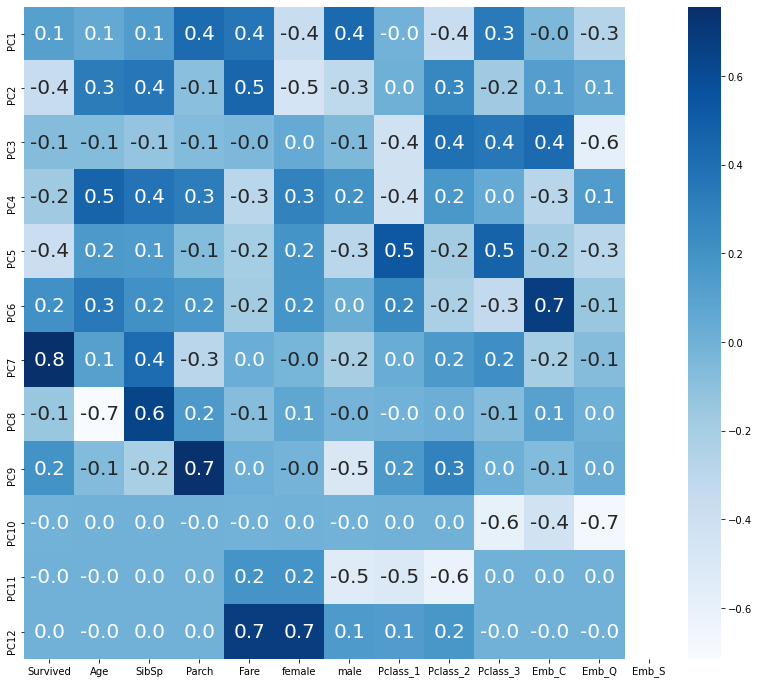

In [23]:
plt.figure(figsize=(14,12))
sns.heatmap(
    pca.components_,
    cmap='Blues',
    annot=True,
    annot_kws={'size':20},
    fmt='1.1f',
    xticklabels=train_df.columns,
    yticklabels=['PC{}'.format(x+1) for x in range(len(features.columns))]
)

In [16]:
#固有値
pd.DataFrame(pca.explained_variance_)

,0
0,2.7166787556
1,2.1367298364
2,1.9605002310
3,1.4795580460
4,1.1245756837
5,0.9357687630
6,0.6979249722
7,0.5629429093
8,0.3936941066
9,0.0051098421


In [17]:
#寄与率
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.2261358111
1,0.1778609759
2,0.1631916578
3,0.1231581239
4,0.0936094611
5,0.0778932098
6,0.0580951389
7,0.0468592583
8,0.0327710208
9,0.0004253423


In [18]:
import matplotlib.ticker as ticker

              0
0  0.2261358111
1  0.4039967870
2  0.5671884449
3  0.6903465688
4  0.7839560299
5  0.8618492397
6  0.9199443786
7  0.9668036369
8  0.9995746577
9  1.0000000000
10 1.0000000000
11 1.0000000000


[]

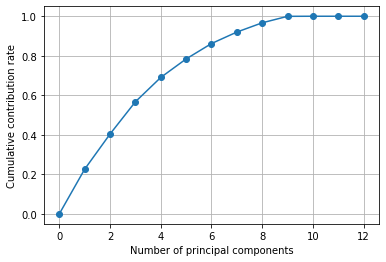

In [19]:
#累積寄与率
print(pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)))

plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0]+list(np.cumsum(pca.explained_variance_ratio_)),'-o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative contribution rate')
plt.grid()
plt.plot()

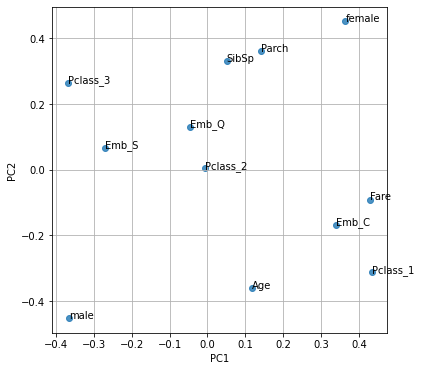

In [20]:
plt.figure(figsize=(6,6))
for x,y,name in zip(pca.components_[0],pca.components_[1],X.columns):
  plt.text(x,y,name)
plt.scatter(pca.components_[0],pca.components_[1],alpha=0.8)
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

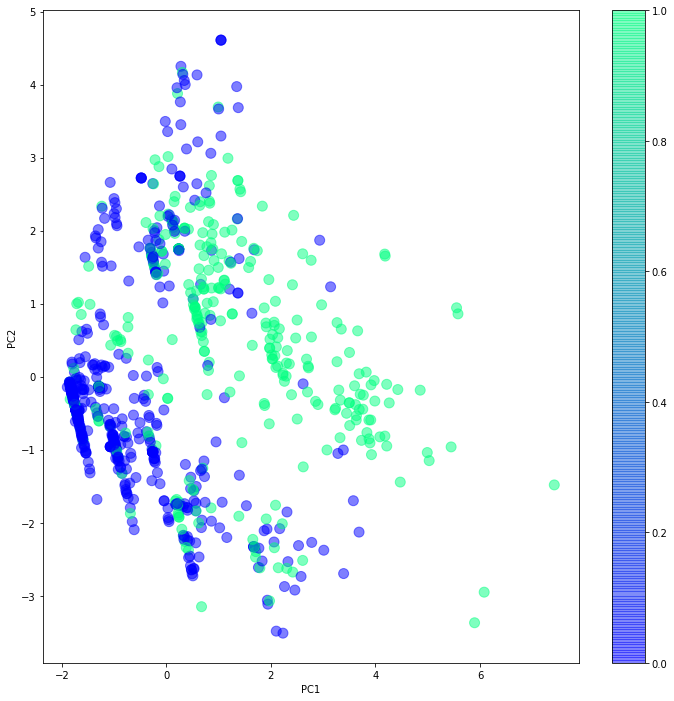

In [21]:
fig,ax=plt.subplots(figsize=(12,12))
features.plot(kind='scatter',x='PC1',y='PC2',s=100,c=train_df['Survived'],cmap='winter',alpha=0.5,ax=ax)

In [28]:
from mpl_toolkits.mplot3d import Axes3D

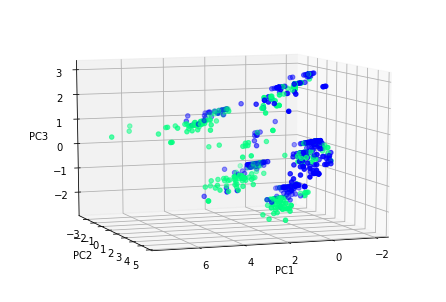

In [45]:
X=features['PC1']
Y=features['PC2']
Z=features['PC3']

fig=plt.figure()
ax=Axes3D(fig)
surf=ax.scatter(X,Y,Z,c=train_df['Survived'],cmap='winter')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=10, azim=70)